In [2]:
%matplotlib inline
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

In [3]:
from math import exp
# define a gaussian kernel function
def GaussianKernel(v1, v2, sigma):
    return exp(-norm(v1-v2, 2)**2/(2.*sigma**2))

# this is a simple kernel function
def simpleKernel(n1,n2,sigma):
    difference = float(n1) - float(n2)
    difference = pow(difference,2)
    difference = (-1.0*difference)/ (sigma**2)
    return exp(difference)

In [17]:
# implement simple mean shift
import numpy as np
# random pick a point
from random import randrange

# Generate dataset
# keep the dataset the same
mu, sigma = 7.8, 3 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
print "Actual mean is ", mu

Actual mean is  7.8


In [18]:
from scipy.spatial import distance

# this function is to calculate the k nearest neighbor
def K_Nearest_Neighbor(current, k, data):
    return_list = []
    index = 0
    distanceList = []
    for x in data:
        distanceList.append((distance.euclidean(current, x), x))
    distanceList.sort()
    #get the k nearest label
    for i in range (0, k):
        #append the first k smallest element
        return_list.append(distanceList[i][1])
    return return_list

In [19]:
threshold = 0.000001
prev = 0.0
# indicate how many neighbors to look
number_of_neighbors = 500

# random choose a point
random_index = randrange(0,len(s))
# randomly initialize the mean
estimate = s[random_index]
iteration = 0
num_of_experiment = 3 # specify run the experiment how many times

for i in range(0,num_of_experiment):
    random_index = randrange(0,len(s)) # random pick a intial at the beginning every time
    estimate = s[random_index]
    iteration = 0
    print "initial estimate mean is ", estimate
    print "num of experiment is ", i
    # experiment starts
    # while less than threshold
    while abs(estimate-prev) >= threshold:
        lst = K_Nearest_Neighbor(estimate, number_of_neighbors, s)
        iteration = iteration + 1
        numerator = 0.0
        denominator = 0.0
        for i in lst:
            # apply the kernel function
            # current is from the last iteration which get the nearest neighbor
            weight = simpleKernel(estimate,i,3.0)
            numerator = numerator + weight*i
            denominator = denominator + weight
        # update mean
        prev = estimate
        estimate = numerator/denominator
        #print "in while ", estimate
    print "number of KNN ", iteration    
    print "converged mode is ", estimate

initial estimate mean is  6.48142565625
num of experiment is  0
in while  6.70769724283
in while  6.92680738061
in while  7.09164812796
in while  7.21707493554
in while  7.32033031287
in while  7.40083829743
in while  7.48160709336
in while  7.55060374683
in while  7.60539079629
in while  7.66277287215
in while  7.70930215013
in while  7.76484432
in while  7.80513384743
in while  7.83642998578
in while  7.8601010129
in while  7.87646706724
in while  7.88562160634
in while  7.89324622066
in while  7.90054588469
in while  7.90209249706
in while  7.90242017869
in while  7.9024896045
in while  7.90250431372
in while  7.90250743015
in while  7.90250809043
number of KNN  25
converged mode is  7.90250809043
initial estimate mean is  8.66736452948
num of experiment is  1
in while  8.49900456094
in while  8.36804755545
in while  8.26414038407
in while  8.17838408344
in while  8.11421207091
in while  8.07203291276
in while  8.03467317929
in while  8.00407267878
in while  7.97497244037
in while  

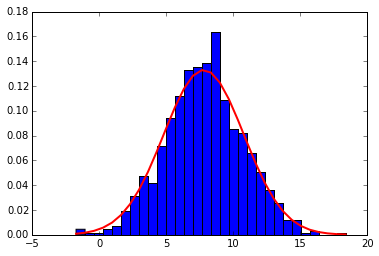

In [20]:
# graph the previous dataset
import matplotlib.pyplot as plt
s.sort()
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()